# Logistic Regression

#### 모듈 불러오기

In [0]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

#### 파라메터 설정

In [0]:
# Hyper-parameters
input_size = 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

#### MNIST 데이터셋으로 데이터로더 구성

In [3]:
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader (input pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:00, 27280843.76it/s]                            


Extracting ../../data/MNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 456923.57it/s]
  1%|          | 16384/1648877 [00:00<00:11, 145868.71it/s]

Extracting ../../data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 7622558.35it/s]                            
8192it [00:00, 181068.49it/s]


Extracting ../../data/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ../../data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


#### 데이터 확인

In [4]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../../data
    Split: Train

In [5]:
# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(images.shape)

torch.Size([100, 1, 28, 28])


In [6]:
print(images[0])

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

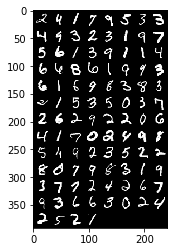

tensor([2, 4, 1, 7, 9, 5, 3, 3, 4, 9, 3, 2, 3, 1, 9, 7, 5, 6, 1, 3, 9, 1, 1, 4,
        6, 6, 8, 6, 1, 9, 9, 3, 6, 1, 6, 9, 8, 3, 8, 3, 2, 1, 5, 3, 5, 0, 3, 7,
        2, 6, 2, 9, 2, 2, 0, 6, 4, 1, 7, 0, 2, 4, 9, 8, 5, 4, 9, 2, 3, 5, 2, 2,
        8, 0, 7, 9, 8, 3, 1, 9, 3, 7, 7, 2, 4, 2, 6, 7, 9, 3, 6, 6, 3, 0, 2, 4,
        2, 5, 2, 1])


In [7]:
# functions to show an image
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(labels)

#### Logistic regression model

In [0]:
model = nn.Linear(input_size, num_classes)

#### Loss and optimizer


In [0]:
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 

#### Train the model

In [11]:
total_step = len(train_loader)
loss_values = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, 28*28)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        loss_values.append(loss.item())
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))


Epoch [1/5], Step [100/600], Loss: 2.1641
Epoch [1/5], Step [200/600], Loss: 2.1187
Epoch [1/5], Step [300/600], Loss: 2.0026
Epoch [1/5], Step [400/600], Loss: 1.9578
Epoch [1/5], Step [500/600], Loss: 1.8207
Epoch [1/5], Step [600/600], Loss: 1.7809
Epoch [2/5], Step [100/600], Loss: 1.6985
Epoch [2/5], Step [200/600], Loss: 1.6743
Epoch [2/5], Step [300/600], Loss: 1.6067
Epoch [2/5], Step [400/600], Loss: 1.5830
Epoch [2/5], Step [500/600], Loss: 1.5281
Epoch [2/5], Step [600/600], Loss: 1.4450
Epoch [3/5], Step [100/600], Loss: 1.3831
Epoch [3/5], Step [200/600], Loss: 1.3652
Epoch [3/5], Step [300/600], Loss: 1.3422
Epoch [3/5], Step [400/600], Loss: 1.3085
Epoch [3/5], Step [500/600], Loss: 1.2782
Epoch [3/5], Step [600/600], Loss: 1.2981
Epoch [4/5], Step [100/600], Loss: 1.1591
Epoch [4/5], Step [200/600], Loss: 1.2010
Epoch [4/5], Step [300/600], Loss: 1.2478
Epoch [4/5], Step [400/600], Loss: 1.1754
Epoch [4/5], Step [500/600], Loss: 1.0635
Epoch [4/5], Step [600/600], Loss:

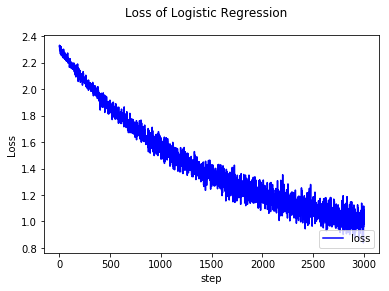

In [12]:
#학습 그래프 출력

fig, loss_ax = plt.subplots()

loss_ax.plot(loss_values, 'b', label='loss',  fillstyle='none')

loss_ax.set_xlabel('step')
loss_ax.set_ylabel('Loss')
fig.suptitle('Loss of Logistic Regression')

loss_ax.legend(loc='lower right')


plt.show()

#### Test the model

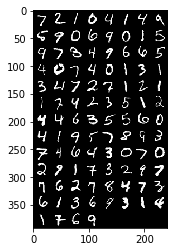

ground truth:  tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0,
        2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4,
        1, 7, 6, 9])
predicted:  tensor([7, 2, 1, 0, 4, 1, 4, 9, 2, 9, 0, 0, 9, 0, 1, 3, 9, 7, 3, 4, 7, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 0, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 3, 3, 2,
        4, 4, 6, 3, 5, 3, 2, 0, 4, 1, 9, 5, 7, 8, 9, 2, 7, 9, 2, 4, 3, 0, 7, 0,
        2, 8, 1, 7, 3, 7, 1, 7, 9, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 8, 3, 1, 4,
        1, 1, 6, 9])


In [13]:
with torch.no_grad():
    # get some random training images
    dataiter = iter(test_loader)
    images, labels = dataiter.next()

    # show images
    imshow(torchvision.utils.make_grid(images))
    
    images = images.reshape(-1, 28*28)
    outputs = model(images)
    
    _, predicted = torch.max(outputs.data, 1)
    
    

    
    # print labels
    print("ground truth: ", labels)
    print("predicted: ", predicted)

In [14]:
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct.item() / total))

Accuracy of the model on the 10000 test images: 82 %
